**CONTENTS**:


1.  Importing the required Libraries 

2.   Understanding the Data

3.   Preprocessing Data for Classification

4.   EDA

5.   Feature engineering

6.   Classification models


         *   Logistic Regression
         *   Decision Tree
         *   Random Forest
         *   SVM
         *   KNN
         *   Gradient Boosting
         *   Neural Networks

7.    Methodology and performance metrics Evaluation















**Importing necessary packages**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score

****Data Preparation & Exploration****

In [2]:
df=pd.read_csv('/content/diabetic_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

* **Encounter ID**: Unique identifier of an encounter
* **Patient number**: Unique identifier of a patient
* **Race Values**: Caucasian, Asian, African American, Hispanic, and other
* **Gender Values**: male, female, and unknown/invalid
* **Age** Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**: Weight in pounds
* **Admission type**: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**: Integer number of days between admission and discharge
* **Payer code** : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**: Number of lab tests performed during the encounter
* **Number of procedures**: Numeric Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**: Number of distinct generic names administered during the encounter
* **Number of outpatient visits**: Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**: Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**: Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3**: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses** : Number of diagnoses entered to the system 0%
* **Glucose serum test** : result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result** : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications** : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications** : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted** : Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Ok, now that we have a glimpse of the data, let's explore them.

The most important column here is readmitted, which tells us if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.

The most important column here is readmitted, which tells us if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.

In [5]:
# count the number of rows for each type
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

Another column that is important is `discharge_disposition_id`, which tells us where the patient went after the hospitalization.

In [6]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

If we look at the IDs_mapping.csv we can see that 11,13,14,19,20,21 are related to death or hospice. We should remove these samples from the predictive model.

In [7]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

Now let's define an output variable for our binary classification. Here we will try to predict if a patient is likely to be re-admitted within 30 days of discharge.

In [8]:
df['target'] = (df.readmitted == '<30').astype('int')

In [9]:
df['target'].value_counts()

0    88029
1    11314
Name: target, dtype: int64

Let's define a function to calculate the prevalence of population that is readmitted with 30 days.

In [10]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [11]:
print('Prevalence:%.3f'%calc_prevalence(df['target'].values))

Prevalence:0.114


Around 11% of the population is rehospitalized. This represented an imbalanced classification problem so we will address that below. 

Now we would like to get a feeling of the data for each column in our dataset. Pandas doesn't allow you to see all the columns at once, so let's look at them in groups of 10.

In [12]:
print('Number of columns:',len(df.columns))

Number of columns: 51


In [13]:
df[list(df.columns)[:10]].head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1


In [14]:
df[list(df.columns)[10:20]].head()

,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2
0,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?
1,?,?,59,0,18,0,0,0,276,250.01
2,?,?,11,5,13,2,0,1,648,250
3,?,?,44,1,16,0,0,0,8,250.43
4,?,?,51,0,8,0,0,0,197,157


In [15]:
df[list(df.columns)[20:30]].head()

,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide
0,?,1,None,None,No,No,No,No,No,No
1,255,9,None,None,No,No,No,No,No,No
2,V27,6,None,None,No,No,No,No,No,No
3,403,7,None,None,No,No,No,No,No,No
4,250,5,None,None,No,No,No,No,No,No


In [16]:
df[list(df.columns)[30:40]].head()

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,Steady,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,Steady,No,No,No,No,No,No,No,No,No


In [17]:
df[list(df.columns)[40:]].head()

,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,target
0,No,No,No,No,No,No,No,No,No,NO,0
1,No,Up,No,No,No,No,No,Ch,Yes,>30,0
2,No,No,No,No,No,No,No,No,Yes,NO,0
3,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [18]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

encounter_id: 99343 unique values
patient_nbr: 69990 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id
[ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient
[ 0  1  2  3  6 

From analysis of the columns, we can see there are a mix of categorical (non-numeric) and numerical data. A few things to point out,

- encounter_id and patient_nbr: these are just identifiers and not useful variables
- age and weight: are categorical in this data set
- admission_type_id,discharge_disposition_id,admission_source_id: are numerical here, but are IDs (see IDs_mapping). They should be considered categorical. 
- examide and citoglipton only have 1 value, so we will not use these variables
- diag1, diag2, diag3 - are categorical and have a lot of values. We will not use these as part of this project, but you could group these ICD codes to reduce the dimension. We will use number_diagnoses to capture some of this information. 
- medical_speciality - has many categorical variables, so we should consider this when making features. 

* **EDA**
* **Data visualization**

**Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations**

Text(0.5, 1.0, 'Distrinution of Readmission')

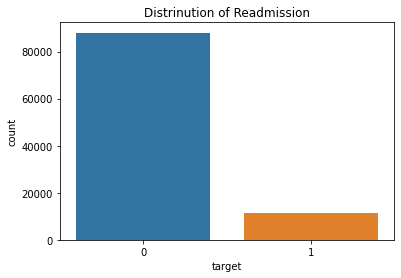

In [ ]:
#Distribution of Readmission
sns.countplot(df['target']).set_title('Distrinution of Readmission')

**Insight from above graph**: Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

In [ ]:
#checking for balance data
print(sum(df['target'].values)/len(df['target'].values)) 

0.11388824577474005


**NOTE**:Only 11% is re hospitalized so this is imbalance dataset

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

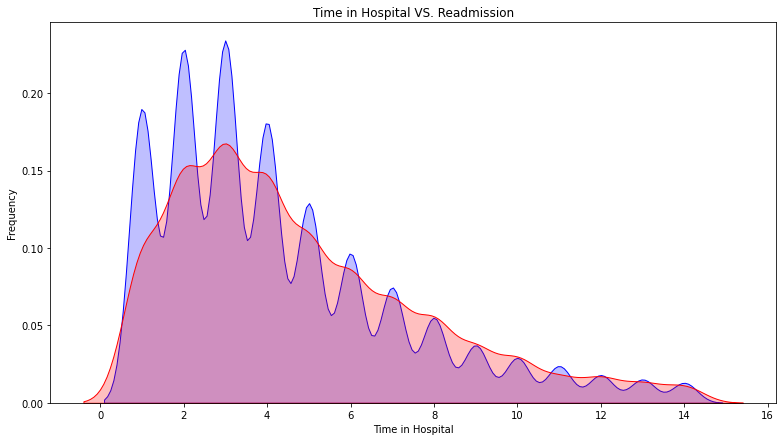

In [ ]:
#time in hospital vs readmitted
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['target'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['target'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

**Insight from above graph**: If no of days in hospital increased readmission rate is getting decreased.Mostly patient between 3 to 4 days are admitted frequently

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

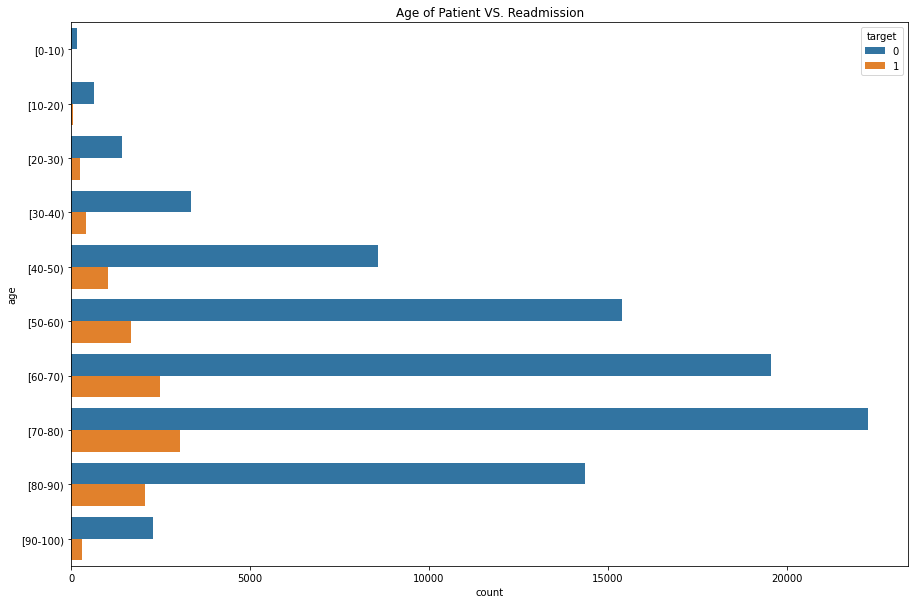

In [ ]:
#age vs readmission

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['target']).set_title('Age of Patient VS. Readmission')

**Insight from above graph**: Patient with age 60 and 70 have more readmission

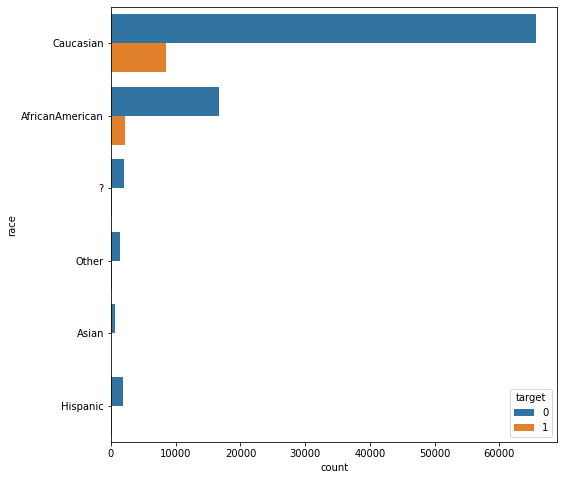

In [ ]:
#race vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['target'])

**Insight from above graph** : Caucasian race has more readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

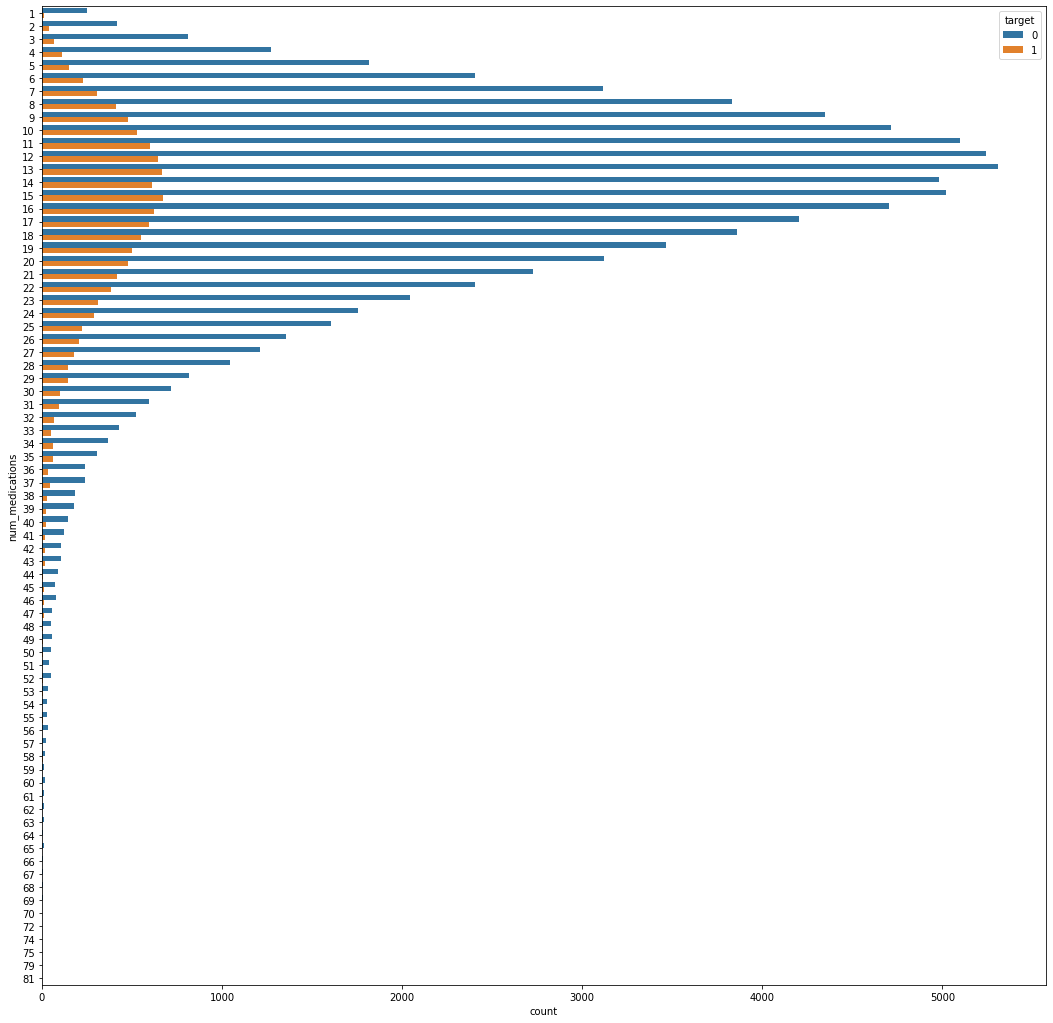

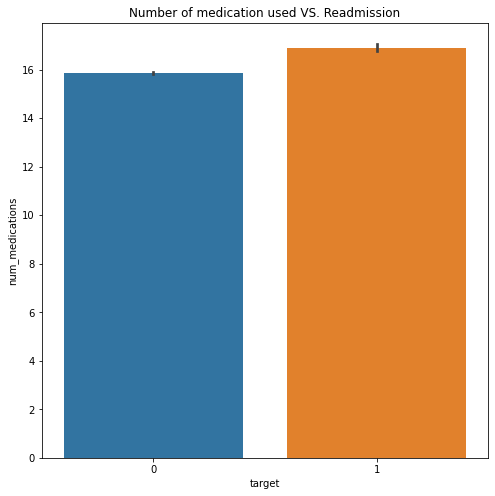

In [ ]:
#Number of medication used VS. Readmission
fig = plt.figure(figsize=(18,18))
sns.countplot(y = df['num_medications'], hue = df['target'])
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['target'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

**Insight from above graph** : If number of medications between 10 and 20 there is more chances that patient will admit again

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

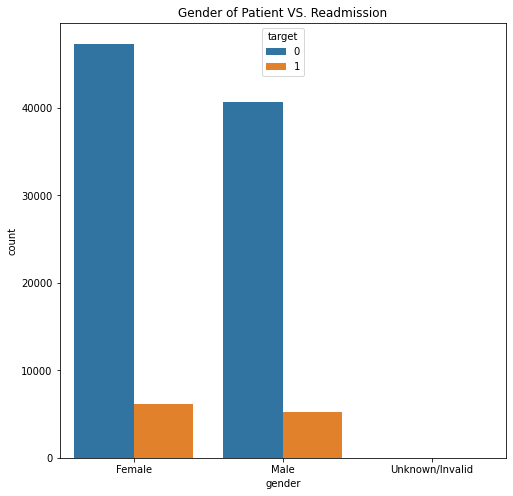

In [ ]:
#Gender and Readmission
#Male = 1
#Female = 0

fig = plt.figure(figsize=(8,8))
sns.countplot(df['gender'], hue = df['target']).set_title("Gender of Patient VS. Readmission")

**Insight from above graph** : Readmission rate of both male and female looks similar

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

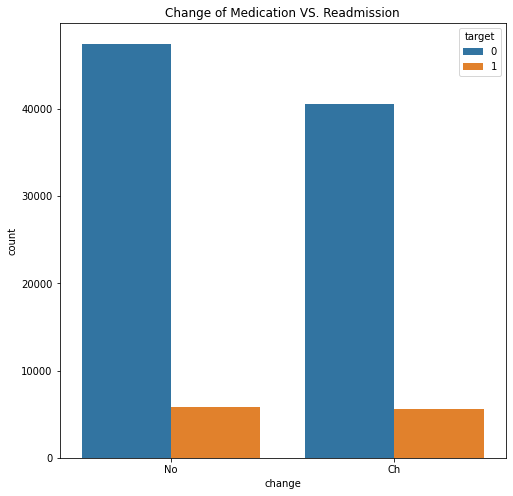

In [ ]:
#change of medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(df['change'], hue = df['target']).set_title('Change of Medication VS. Readmission')

**Insight from above graph** :Readmission rate looks similar wheteher the change of mediacation occurs or not

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

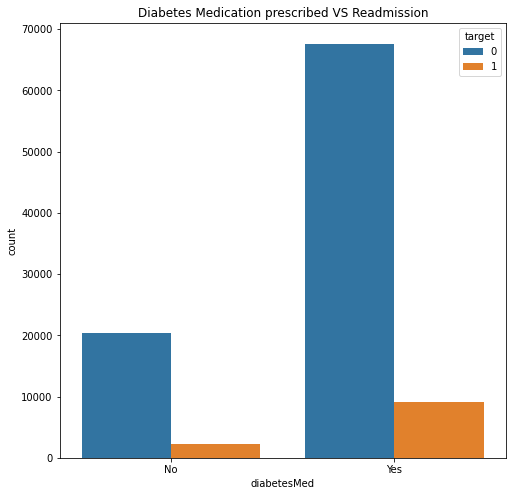

In [ ]:
#diabetic medication vs readmission

fig = plt.figure(figsize=(8,8))
sns.countplot(df['diabetesMed'], hue = df['target']).set_title('Diabetes Medication prescribed VS Readmission')

**Insight from above graph** : Patients provided with diabetes medication readmitted often

**Glucose Serum test** - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

**'>200'** :  = indicates diabetes
**'>300'** :  = Indicates diabetes
**'Norm'** :  = Normal
**'None'** :  = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

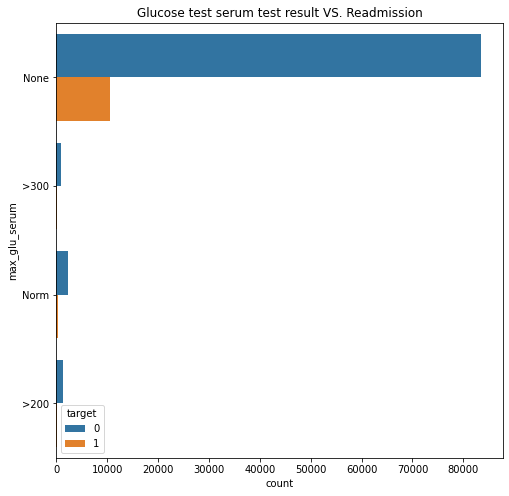

In [ ]:
#max_glue_serum vs target
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['target']).set_title('Glucose test serum test result VS. Readmission')

**Insight from above graph** : Patient who doen't take max glue serum test is readmitted often

**A1C result and Readmission A1C test** - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months



* **'>7'** :1
* **'>8'** :1
* **Norm ** : 0 = Normal
* **None ** : -99 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

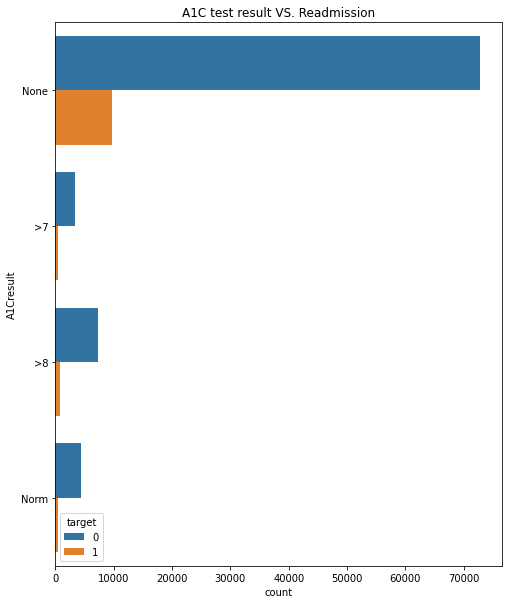

In [ ]:
#a1c test result vs target
fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['A1Cresult'], hue = df['target']).set_title('A1C test result VS. Readmission')

**Insight from above graph** : Patient who doen't take a1ctest is readmitted often

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

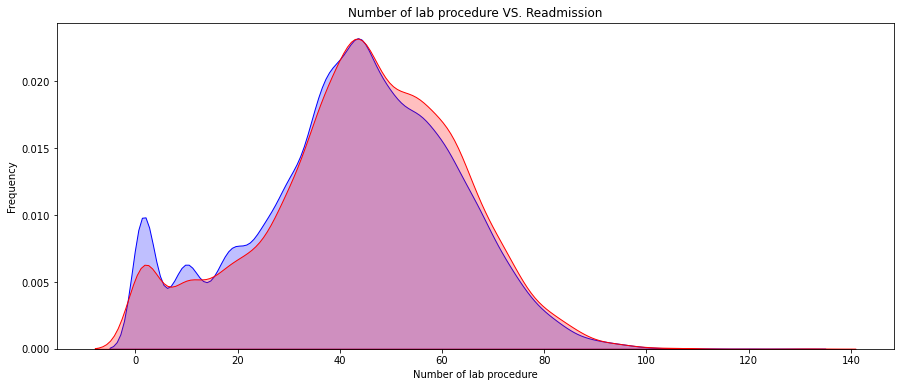

In [ ]:
#no of lab procedure vs target
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['target'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['target'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

**Insight from above graph** : Both  admission and  readmission have similar pattern for number of lab procedures

Text(0.5, 1.0, 'admission_type_id VS. Readmission')

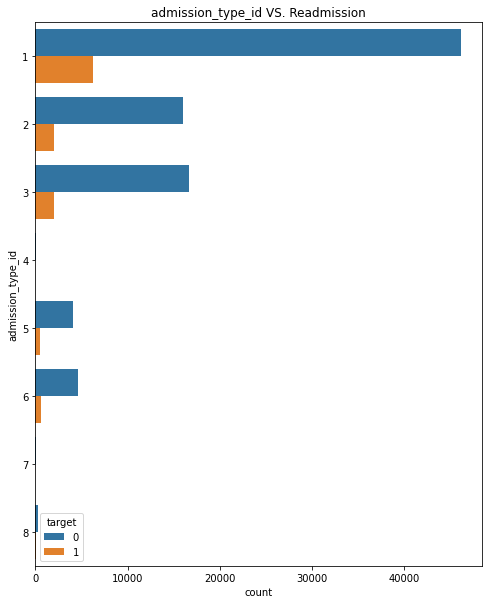

In [ ]:
#admission type vs readmission
#1-	Emergency
#2-Urgent
#3-Elective
#4-Newborn
#5-Not Available
#6-NULL
#7-Trauma Center
#8-Not Mapped

fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['admission_type_id'], hue = df['target']).set_title('admission_type_id VS. Readmission')

**Insight from above graph** : Patient who admitted as emergency has more readmission 

Text(0.5, 1.0, 'discharge_disposition_id VS. Readmission')

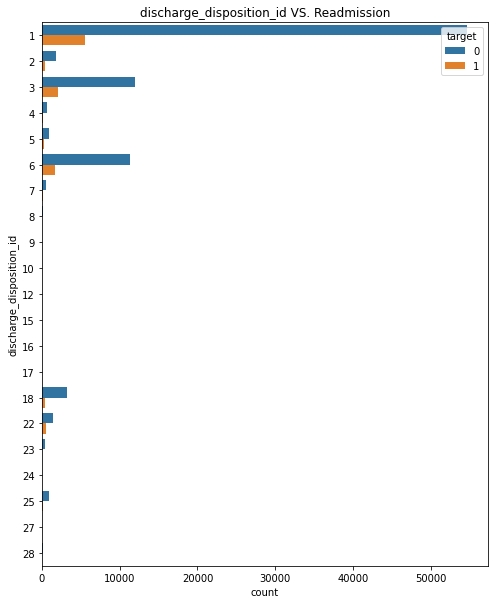

In [ ]:
#discharge_disposition_id VS. Readmission
fig = plt.figure(figsize=(8,10))
sns.countplot(y= df['discharge_disposition_id'], hue = df['target']).set_title('discharge_disposition_id VS. Readmission')

**Insight from above graph** : Patient who discharged to home has more readmission rate

##Feature Engineering

In this section, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical features, categorical features and extra features.

In this data set, the missing numbers were filled with a question mark. Let's replace it with a nan representation.

In [19]:
# replace ? with nan
df = df.replace('?',np.nan)

**Numerical Features**

The easiest type of features to use is numerical features. These features do not need any modification. The columns that are numerical that we will use are shown below

In [20]:
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

Let's check if there are any missing values in the numerical data.

In [21]:
df[cols_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64


**Categorical Features**

The next type of features we want to create are categorical variables. Categorical variables are non-numeric data such as race and gender. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

The first set of categorical data we will deal with are these columns:

In [22]:
cols_cat = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code']

**Let's check if there are any missing data**

In [23]:
df[cols_cat].isnull().sum()

race                         2234
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  39398
dtype: int64

race, payer_code, and medical_specialty have missing data. Since these are categorical data, the best thing to do is to just add another categorical type for unknown using the fillna function.

In [24]:
df['race'] = df['race'].fillna('UNK')
df['payer_code'] = df['payer_code'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')

Let's investigate medical specialty before we begin.

In [25]:
print('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
UNK                                 48616
InternalMedicine                    14237
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

We can see that most of them are unknown and that the count drops off pretty quickly. We don't want to add 73 new variables since some of them only have a few samples. As an alternative, we can create a new variable that only has 11 options (the top 10 specialities and then an other category). Obviously, there are other options for bucketing, but this is one of the easiest methods.

In [26]:
top_10 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10),'med_spec'] = 'Other'

In [27]:
df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
Family/GeneralPractice         7252
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                          8199
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

To convert our categorical features to numbers, we will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column race, we would create new columns ('race_Caucasian','race_AfricanAmerican', etc). If the patient's race is Caucasian, the patient gets a 1 under 'race_Caucasian' and 0 under the rest of the race columns. To create these one-hot encoding columns, we can use the get_dummies function.

Now the problem is that if we create a column for each unique value, we have correlated columns. In other words, the value in one column can be figured out by looking at the rest of the columns. For example, if the sample is not AfricanAmerican, Asian, Causasian, Hispance or Other, it must be UNK. To deal with this, we can use the drop_first option, which will drop the first categorical value for each column.

The get_dummies function does not work on numerical data. To trick get_dummies, we can convert the numerical data into strings and then it will work properly.

In [28]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

df[cols_cat_num] = df[cols_cat_num].astype('str')

Now we are ready to make all of our categorical features

In [29]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num + ['med_spec']],drop_first = True)

To add the one-hot encoding columns to the dataframe we can use concat function. Make sure to use axis = 1 to indicate add the columns.

In [30]:
df = pd.concat([df,df_cat], axis = 1)

Save the column names of the categorical data.

In [31]:
cols_all_cat = list(df_cat.columns)

**Extra features**

The last two columns we want to make features are age and weight. Typically, you would think of these as numerical data, but they are categorical in this dataset as shown below.

In [32]:
df[['age', 'weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


One option could be to create categorical data as shown above. Since there is a natural order to these values, it might make more sense to convert these to numerical data. Another example when you would want to do this might be size of a t-shirt (small, medium, large). Let's start with age.

In [33]:
df.groupby('age').size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

Let's map these to 0-9 for the numerical data. 

In [34]:

age_id = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_group'] = df.age.replace(age_id)

Now let's look at weight. Recall that this feature is not filled out very often.

In [35]:
df.weight.notnull().sum()

3125

Instead of creating an ordinal feature that we did above, let's just create a variable to say if weight was filled out or not. The presence of a variable might be predictive regardless of the value.

In [36]:
df['has_weight'] = df.weight.notnull().astype('int')

In [37]:
cols_extra = ['age_group','has_weight']

**Engineering Features Summary**

In [38]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 143
Numerical Features: 8
Categorical Features: 133
Extra features: 2


Let's check if we are missing any data.

In [39]:
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

time_in_hospital               0
discharge_disposition_id_16    0
admission_type_id_6            0
admission_type_id_7            0
admission_type_id_8            0
discharge_disposition_id_10    0
discharge_disposition_id_12    0
discharge_disposition_id_15    0
discharge_disposition_id_17    0
admission_type_id_4            0
dtype: int64

let's make a new dataframe that only has the columns of interest

In [40]:
col2use = cols_num + cols_all_cat + cols_extra
df_data = df[col2use + ['target']]

**Model Building**

In [41]:
X=df_data.drop(['target'],axis=1).values
y=df_data['target'].values

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
X_train.shape

(73872, 141)

In [ ]:
Y_train.shape

(73872,)

In [ ]:
X_test.shape

(18468, 141)

In [ ]:
Y_test.shape

(18468,)

##Logistic Regression

In [ ]:
#Split data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=41)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Model Building**

In [ ]:
class MultiClassLogisticRegression:
    """
    Multiclass logistic regression
    """
    
    def __init__(self, epochs = 10000, threshold=1e-3):
        """
        Constructor for multiclass regression

        Args:
            epochs (int, optional): No of iteration Defaults to 10000.
            threshold (_type_, optional): Each iteration thresold. Defaults to 1e-3.
        """
        self.epochs = epochs
        self.threshold = threshold
    
    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        """
        Train the model

        Args:
            X (_type_): Features
            y (_type_): Labels
            batch_size (int, optional): Batch size per iterations. Defaults to 64.
            lr (float, optional): Learning rate. Defaults to 0.001.
            rand_seed (int, optional): _description_. Defaults to 4.
            verbose (bool, optional): _description_. Defaults to False.

        Returns:
            _type_: return the instance 
        """
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.epochs or i < self.epochs):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.threshold: 
                break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_random_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return round(np.mean(self.predict_classes(X) == y),3)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

**Fitting the Model**

In [ ]:
lrModel = MultiClassLogisticRegression(threshold=1e-5)
lrModel.fit(X_train,Y_train,lr=0.0001)

**Predictions on training and test data**

In [ ]:
lr_ypred_tr = lrModel.predict_classes(X_train)
lr_ypred_te = lrModel.predict_classes(X_test)

**Performance metrics used**

**Accuracy & Classification Report**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print("accuracy_score of logistic training data:",round(accuracy_score(Y_train,lr_ypred_tr)*100,2),'%')
print("accuracy_score of logistic testing data:",round(accuracy_score(Y_test,lr_ypred_te)*100,2),'%')

accuracy_score of logistic training data: 88.59 %
accuracy_score of logistic testing data: 88.64 %


In [ ]:
print(f"Classification Report of Logistic train data = \n",classification_report(Y_train, lr_ypred_tr))
print(f"Classification Report of Logistic test data = \n",classification_report(Y_test, lr_ypred_te))

Classification Report of Logistic train data = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     70422
           1       0.48      0.02      0.03      9052

    accuracy                           0.89     79474
   macro avg       0.68      0.51      0.49     79474
weighted avg       0.84      0.89      0.84     79474

Classification Report of Logistic test data = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     17607
           1       0.53      0.02      0.04      2262

    accuracy                           0.89     19869
   macro avg       0.71      0.51      0.49     19869
weighted avg       0.85      0.89      0.84     19869



**Confusion Matrix**

In [48]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import scikitplot as skplt

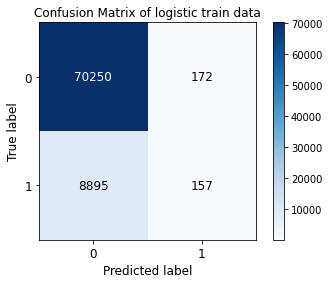

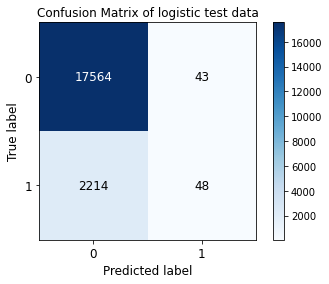

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_train,lr_ypred_tr, title="Confusion Matrix of logistic train data",text_fontsize='large')
skplt.metrics.plot_confusion_matrix(Y_test,lr_ypred_te, title="Confusion Matrix of logistic test data",text_fontsize='large')

**Feature Importance**

Logistic regression is a very interpretable model because the coefficient for each variable shows how important that variable is for the prediction. Note that you need to have normalized the data so the coefficients are comparable between variables. We can extract the coefficients using coef_ and store in a new dataframe (sorted by importance)

In [ ]:
feature_importances = pd.DataFrame(lrModel.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
feature_importances.head()

,importance
number_inpatient,0.324954
discharge_disposition_id_22,0.184061
med_spec_UNK,0.143227
discharge_disposition_id_3,0.137059
rosiglitazone_No,0.119903


For logistic regression, the variables with highest positive coefficients are predictive of re-hospitalization and the variables with highest negative coefficients are predictive of not being re-hospitalized. We can plot the top 10 for each direction below.

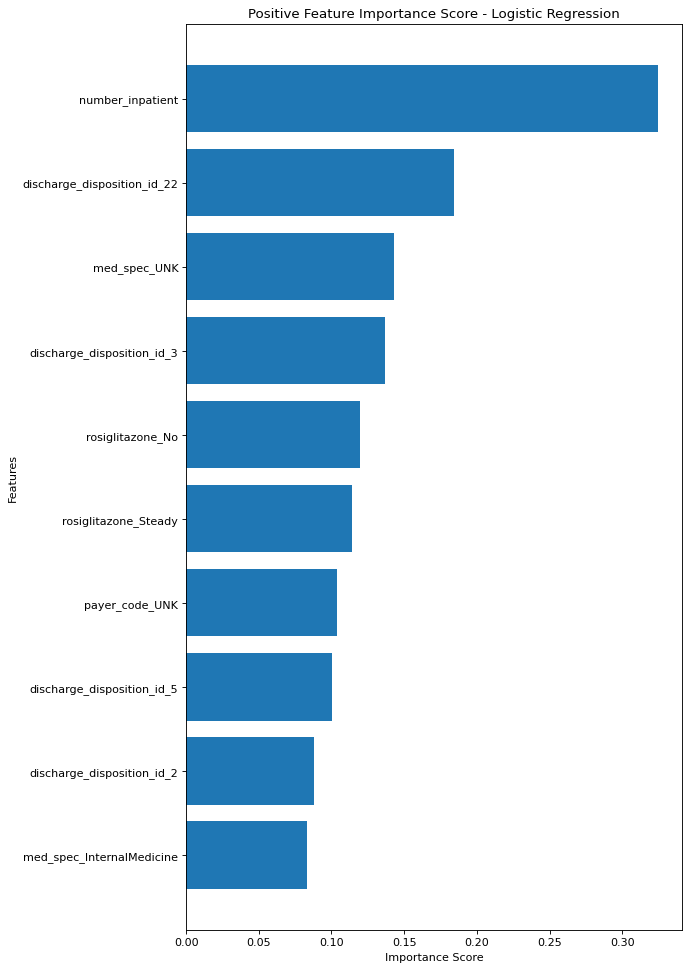

In [ ]:
num = 10
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

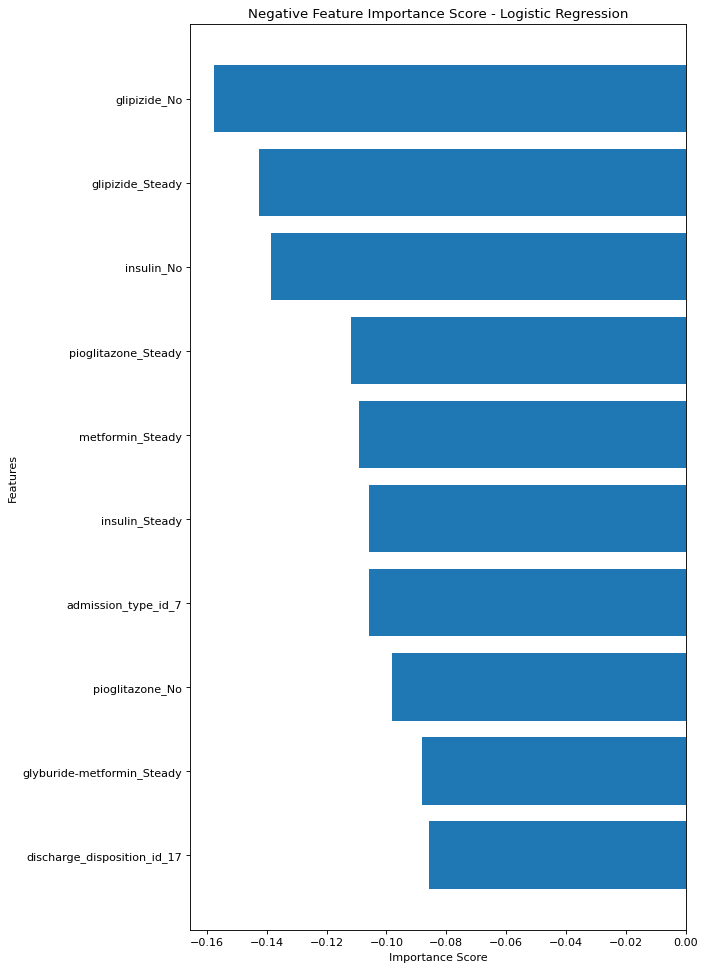

In [ ]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

##Decision tree

**Custom decision tree Model**

**Node class**

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

**Fitting the model**

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_10 <= 1 ? 0.003577019175359075
 left:X_121 <= 0 ? 0.001236084748642563
  left:X_10 <= 0 ? 0.0007269071526675441
    left:X_2 <= 1 ? 0.0006999861339688773
        left:0
        right:0
    right:X_129 <= 0 ? 0.0006380481508014291
        left:0
        right:0
  right:X_11 <= 8 ? 0.00589766324970753
    left:X_45 <= 0 ? 0.025413593405591683
        left:0
        right:0
    right:X_158 <= 0 ? 0.004513729709531233
        left:0
        right:0
 right:X_10 <= 4 ? 0.00744734547013659
  left:X_110 <= 0 ? 0.001943383415569766
    left:X_121 <= 0 ? 0.0007629646388878086
        left:0
        right:0
    right:0
  right:X_10 <= 7 ? 0.005967113022811832
    left:X_0 <= 70 ? 0.004224068808363901
        left:0
        right:0
    right:X_2 <= 9 ? 0.010650205009564595
        left:0
        right:0


**Predictions on training or test data**

In [ ]:
Y_pred_deci_tr = classifier.predict(X_train) 

In [ ]:
Y_pred_deci_te = classifier.predict(X_test) 

**Performance metrics**

**Accuracy & Classification Report**

In [ ]:
print("accuracy_score:",round(accuracy_score(Y_train,Y_pred_deci_tr)*100,2),'%')

accuracy_score: 88.77 %


In [ ]:
print("accuracy_score:",round(accuracy_score(Y_test,Y_pred_deci_te)*100,2),'%')

accuracy_score: 88.79 %


In [ ]:
print(f"Classification Report of decision model train data = \n", classification_report(Y_train, Y_pred_deci_tr))
print(f"Classification Report of decision model test data = \n", classification_report(Y_test, Y_pred_deci_te))

Classification Report of decision model train data = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     71190
           1       0.00      0.00      0.00      9002

    accuracy                           0.89     80192
   macro avg       0.44      0.50      0.47     80192
weighted avg       0.79      0.89      0.83     80192

Classification Report of decision model test data = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     17801
           1       0.00      0.00      0.00      2248

    accuracy                           0.89     20049
   macro avg       0.44      0.50      0.47     20049
weighted avg       0.79      0.89      0.84     20049



**Confusion matrix**

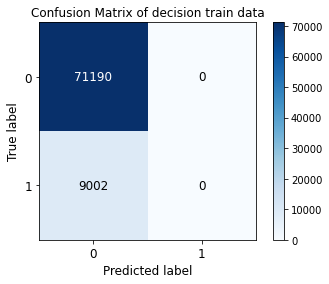

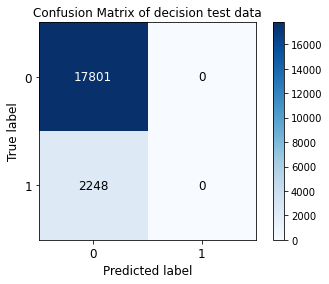

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_train,Y_pred_deci_tr, title="Confusion Matrix of decision train data",text_fontsize='large')
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred_deci_te, title="Confusion Matrix of decision test data",text_fontsize='large')

**Feature Importance**

In [ ]:
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
feature_importances.head()

,importance
number_inpatient,0.300525
num_lab_procedures,0.073411
num_medications,0.068013
discharge_disposition_id_22,0.055954
time_in_hospital,0.044933


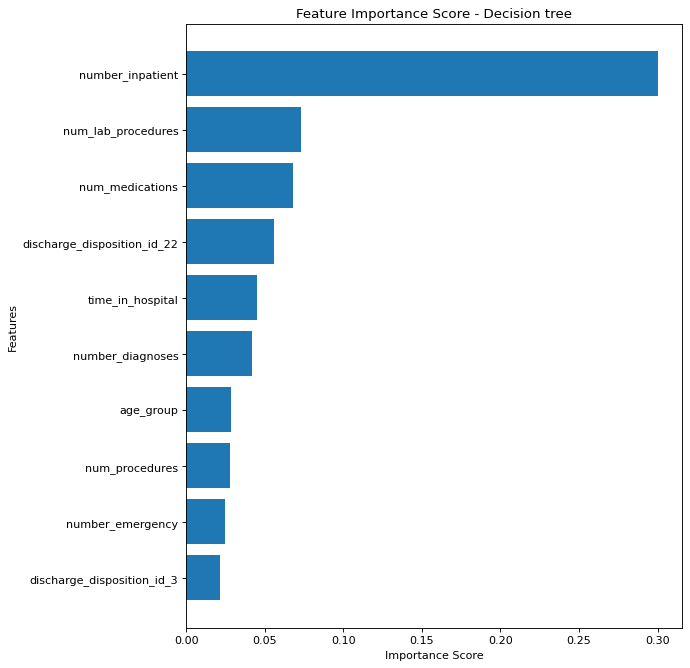

In [ ]:
num = 10
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Decision tree')
plt.yticks(ylocs, feature_labels)
plt.show()

##Random forest

In [ ]:
from pprint import pprint
import pandas as pd
import numpy as np
import random

In [ ]:
class DecisionTree(object):

    def __init__(self, max_depth = 3, min_samples = 2, impurity = 'entropy'):
        self.max_depth = max_depth
        self.min_samples = min_samples
        assert impurity in ['entropy','gini'],"Invalid impurity method, choose 'entropy' or 'gini'"
        self._impurity = impurity
    
    def _check_purity(self, data):
        """ helper """
        label_column = data[:, -1]
        qty_unique_classes = len(np.unique(label_column))
    
        return not (qty_unique_classes - 1)
    
    def _classify_data(self, data):
        """ helper """
        label_column = data[:, -1]
        unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)
        prevalent_class_index = counts_unique_classes.argmax()
        classification = unique_classes[prevalent_class_index]

        return unique_classes, counts_unique_classes
    
    def _get_potential_splits(self, data):
        """ helper """
        potential_splits = {}
        n_columns = data.shape[1]
        
        rolling_mean = lambda a: ((a[1:] + a[:-1])/2).tolist()

        for column_index in range(n_columns - 1):        # excluding the last column which is the label
            values = data[:, column_index]
            unique_values = np.unique(values)

            potential_splits[column_index] = rolling_mean(unique_values)

        return potential_splits
    
    def _split_data(self, data, split_column, split_value):
        """ helper """
        split_column_values = data[:, split_column]
        
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]

        return data_below, data_above
    
    def _calculate_impurity(self, data):
        """ helper """
        label_column = data[:, -1]
        counts = np.unique(label_column, return_counts=True)[1] # note que np.unique so retorna labels encontrados...

        probabilities = counts / counts.sum()
        if self._impurity == 'gini':
            impurity = - probabilities @ np.log2(probabilities) # ... assim não vai existir 0 * inf, o que no lim daria 0 mesmo
        else: # entropy otherwise
            impurity = probabilities @ (1-probabilities)
            
        return impurity
    
    
    def _calculate_overall_impurity(self, data_below, data_above):
        """ helper """
        lens_ba = np.array([len(data_below), len(data_above)])
        probs_ba = lens_ba / lens_ba.sum()

        entropy_ba = np.array([self._calculate_impurity(data_below), 
                               self._calculate_impurity(data_above)])

        overall_entropy =  probs_ba @ entropy_ba
        
        return overall_entropy
    
    def _determine_best_split(self, data, potential_splits):
        """ helper """
        overall_entropy = 9999
        for column_index in potential_splits:
            for value in potential_splits[column_index]:
                data_below, data_above = self._split_data(data, 
                                                          split_column=column_index, 
                                                          split_value=value)
                current_overall_entropy = self._calculate_overall_impurity(data_below, 
                                                                          data_above)
                if current_overall_entropy <= overall_entropy:
                    overall_entropy = current_overall_entropy
                    best_split_column = column_index
                    best_split_value = value

        return best_split_column, best_split_value
    
    def _stop_split(self, data, counter):
        """
        helper. O nó deve parar de ser dividido?
        incluir todas as condições para parar de dividir o nó
        returns
        -------
        stop_split:
            True: if terminal node, then one of the stop conditions is accomplished.
            False: if it is an intermediate node, then it can continue splitting
        """
        stop_split = self._check_purity(data) or (len(data) < self.min_samples) or \
                    (counter == self.max_depth)
        return stop_split
    
    def fit(self, df):
        """
        External function
        """
        self.tree_ = self._decision_tree_algorithm(df)
    
    def _decision_tree_algorithm(self, df, counter = 0):
        """
        Building a decision tree recursively.
        """
    
        if counter == 0:
            self.column_headers = df.columns
            data = df.values
        else:
            data = df           

        # base cases
        basecase_reached = self._stop_split(data, counter)
        if basecase_reached:
            classification, counts_unique_classes = self._classify_data(data)
            return classification, counts_unique_classes

        # recursive part
        else:    
            counter += 1

            # helper functions 
            potential_splits = self._get_potential_splits(data)
            split_column, split_value = self._determine_best_split(data, potential_splits)
            data_below, data_above = self._split_data(data, split_column, split_value)

            # instantiate sub-tree
            feature_name = self.column_headers[split_column]
            question = "{} <= {}".format(feature_name, split_value)
            sub_tree = {question: []}

            # find answers (recursion)
            yes_answer = self._decision_tree_algorithm(data_below, counter)
            no_answer  = self._decision_tree_algorithm(data_above, counter)

            # If the answers are the same, then there is no point in asking the question.
            # This could happen when the data is classified even though it is not pure
            # yet (min_samples or max_depth base case).
            if np.array_equal(yes_answer, no_answer):
                sub_tree = yes_answer
            else:
                sub_tree[question].append(yes_answer)
                sub_tree[question].append(no_answer)

            return sub_tree
    
    def predict(self, df):
        """
        External prediction
        """
        prediction = df.apply(self._classify_example, axis = 1)
        prediction = prediction.apply(pd.Series)
        prediction.columns = ['pred', 'proba']
        
        return prediction
    
    def _calc_probs(self, a):
        """ helper, returns L1-normalized vec"""
        norm = a[1].sum()
        res = {k: v/norm for k, v in zip(a[0], a[1])}
        return res

    def _get_most_prevalent_class(self, a):
        """ helper, returns the prevalent class"""
        most_prevalent_idx = a[1].argmax()
        most_prevalent_class = a[0][most_prevalent_idx]
        return most_prevalent_class
    
    def _classify_example(self, example, tree = None):
        """ classification and probabilities
        """
        
        if not tree:  # prim. chamada, usar arvore inteira
            tree = self.tree_
        
        question = list(tree.keys())[0]
        feature_name, comparison_operator, value = question.split(" ")

        # ask question
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]

        # base case
        if not isinstance(answer, dict):
            probs = self._calc_probs(answer)
            the_class = self._get_most_prevalent_class(answer)
            return the_class, probs

        # recursive part
        else:
            residual_tree = answer
            return self._classify_example(example, residual_tree)
    


In [ ]:
class RandomForestClassifier(object):
    
    def __init__(self, n_estimators=10, bootstrap_value=1.0, **tree_params):
        ''' Constructor. 
                n_estimators: number of bagged trees
                boostrap_value: sample size, either in percentages or number of samples
                tree_params: decision tree hyperparams
        '''
        self._tree_params = tree_params
        self._n_estimators = n_estimators
        self._estimators = [DecisionTree(**tree_params) for _ in range(n_estimators)]
        self._bootstrap_value = bootstrap_value
        
    def _bootstrap(self, df):
        ''' helper: Sampling without replacement '''            
        dados = df.values
        samples = []
        sample_size = self._bootstrap_value if self._bootstrap_value > 1 else int(self._bootstrap_value*len(dados))
        for i in range(self._n_estimators):  # One sample per estimator
            s = random.choices(dados, k = sample_size)
            s = pd.DataFrame(s, columns=df.columns.values)
            samples.append(s)
                    
        return samples
    
    def fit(self, df):
        ''' Train bagged trees '''
        samples = self._bootstrap(df)
        for i, tree in enumerate(self._estimators):
            tree.fit(samples[i])
            
    def _format_prediction(self, predictions):
        ''' helper: Formats the predictions in a easy-to-read format '''
        prediction = sum(predictions)/self._n_estimators # Average of predictions
        prediction['pred'] = prediction.idxmax(axis=1)
        cols = prediction.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        return prediction[cols]
    
    def predict(self, df):
        ''' Make predictions and return the probabilities along the class with highest probability '''
        predictions = []
        for tree in self._estimators:
            pred = tree.predict(df)
            pred = pred['proba'].apply(pd.Series).fillna(0)
            predictions.append(pred)
        
        return self._format_prediction(predictions)

**Fitting the RF model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=9, n_estimators=450, random_state=43)

**Predictions on training and testing data**

In [ ]:
Y_pred_rf_tr= rf.predict(X_train) 

In [ ]:
Y_pred_rf_te= rf.predict(X_test) 

**Performance metrics of random forest data**

**Classification report**

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print(f"Classification Report of rf model train data = \n", classification_report(Y_train, Y_pred_rf_tr))
print(f"Classification Report of rf model test data = \n", classification_report(Y_test, Y_pred_rf_te))

Classification Report of rf model train data = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     70422
           1       0.00      0.00      0.00      9052

    accuracy                           0.89     79474
   macro avg       0.44      0.50      0.47     79474
weighted avg       0.79      0.89      0.83     79474

Classification Report of rf model test data = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     17607
           1       0.00      0.00      0.00      2262

    accuracy                           0.89     19869
   macro avg       0.44      0.50      0.47     19869
weighted avg       0.79      0.89      0.83     19869



**Confusion matrix**

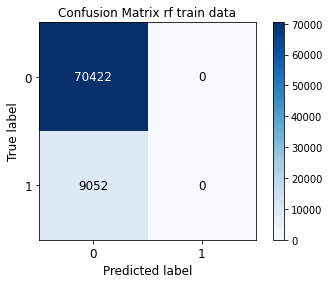

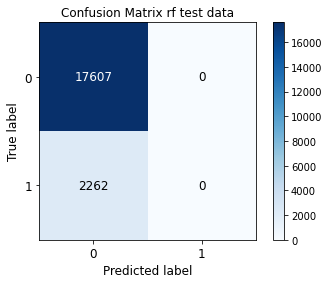

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_train, Y_pred_rf_tr, title="Confusion Matrix rf train data",text_fontsize='large')
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred_rf_te, title="Confusion Matrix rf test data",text_fontsize='large')
plt.show()

**Feature Importance in Random forest model**

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
feature_importances[:10]

,importance
number_inpatient,0.250386
discharge_disposition_id_22,0.068877
number_emergency,0.058644
num_medications,0.049916
time_in_hospital,0.044914
num_lab_procedures,0.041937
number_diagnoses,0.037716
age_group,0.029282
number_outpatient,0.021612
num_procedures,0.020066


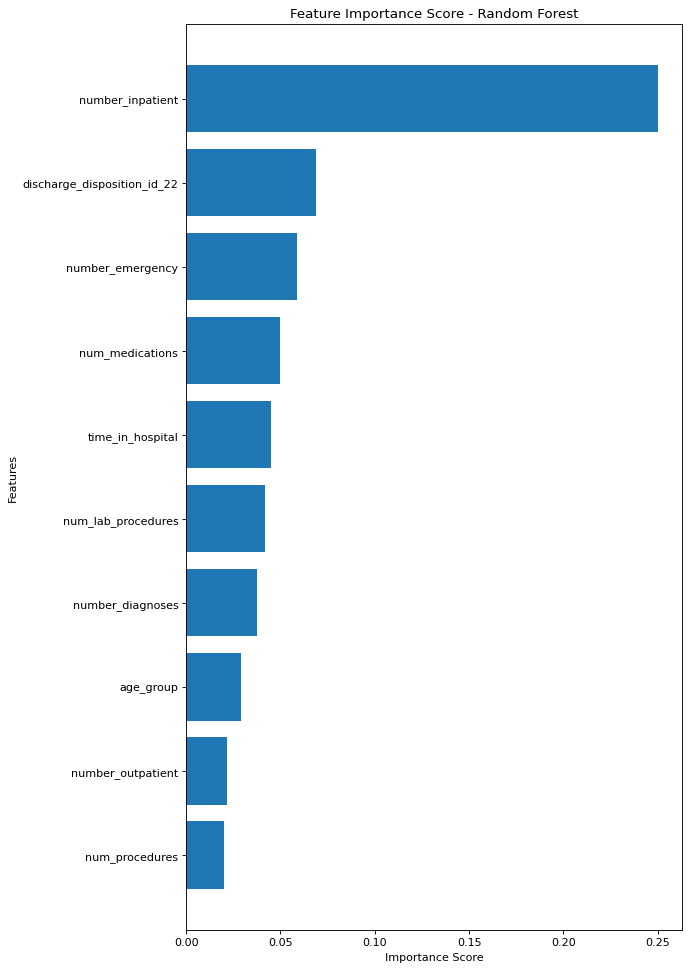

In [ ]:
num = 10
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

##KNN MODEL

**Custom model**

In [ ]:
from abc import ABC,abstractmethod
from typing import Dict, Any
from scipy import stats

In [ ]:
class KNN(ABC):
    """
    Base class for KNN implementations
    """
    
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K      -> integer specifying number of neighbours to consider
            metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p      -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # check distance is a valid entry
        valid_distance = ['minkowski','cosine']
        if metric not in valid_distance:
            msg = "Entered value for metric is not valid. Pick one of {}".format(valid_distance)
            raise ValueError(msg)
        # check minkowski p parameter
        if (metric == 'minkowski') and (p <= 0):
            msg = "Entered value for p is not valid. For metric = 'minkowski', p >= 1"
            raise ValueError(msg)
        # store/initialise input parameters
        self.K       = K
        self.metric  = metric
        self.p       = p
        self.X_train = np.array([])
        self.y_train = np.array([])
        
    def __del__(self) -> None:
        """
        Destructor function. 
        """
        del self.K
        del self.metric
        del self.p
        del self.X_train
        del self.y_train
      
    def __minkowski(self, x : np.array) -> np.array:
        """
        Private function to compute the minkowski distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return np.power(np.sum(np.power(np.abs(self.X_train - x),self.p),axis=1),1/self.p)
    
    def __cosine(self, x : np.array) -> np.array:
        """
        Private function to compute the cosine distance between point x and the training data X
        Inputs:
            x -> numpy data point of predictors to consider
        Outputs:
            np.array -> numpy array of the computed distances
        """
        return (1 - (np.dot(self.X_train,x)/(np.linalg.norm(x)*np.linalg.norm(self.X_train,axis=1))))
    
    def __distances(self, X : np.array) -> np.array:
        """
        Private function to compute distances to each point x in X[x,:]
        Inputs:
            X -> numpy array of points [x]
        Outputs:
            D -> numpy array containing distances from x to all points in the training set.
        """
        # cover distance calculation
        if self.metric == 'minkowski':
            D = np.apply_along_axis(self.__minkowski,1,X)
        elif self.metric == 'cosine':
            D = np.apply_along_axis(self.__cosine,1,X)
        # return computed distances
        return D
    
    @abstractmethod
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        """
        pass
        
    def fit(self, X : np.array, y : np.array) -> None:
        """
        Public training function for the class. It is assummed input X has been normalised.
        Inputs:
            X -> numpy array containing the predictor features
            y -> numpy array containing the labels associated with each value in X
        """
        # store training data
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)
        
    def predict(self, X : np.array) -> np.array:
        """
        Public prediction function for the class. 
        It is assummed input X has been normalised in the same fashion as the input to the training function
        Inputs:
            X -> numpy array containing the predictor features
        Outputs:
           y_pred -> numpy array containing the predicted labels
        """
        # ensure we have already trained the instance
        if (self.X_train.size == 0) or (self.y_train.size == 0):
            raise Exception('Model is not trained. Call fit before calling predict.')
        # compute distances
        D = self.__distances(X)
        # obtain indices for the K nearest neighbours
        idx_neighbours = D.argsort()[:,:self.K]
        # compute predictions
        y_pred = self._generate_predictions(idx_neighbours)
        # return results
        return y_pred
    
    def get_params(self, deep : bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
            deep -> boolean input parameter
        Outputs:
            Dict -> dictionary of stored class input parameters
        """
        return {'K':self.K,
                'metric':self.metric,
                'p':self.p}

In [ ]:
class KNNClassifier(KNN):
    """
    Class for KNN classifiction implementation
    """
    
    def __init__(self, K : int = 3, metric : str = 'minkowski', p : int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
            K       -> integer specifying number of neighbours to consider
            metric  -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
            p       -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # call base class initialiser
        super().__init__(K,metric,p)
        
    def _generate_predictions(self, idx_neighbours : np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        Inputs:
            idx_neighbours -> indices of nearest neighbours
        Outputs:
            y_pred -> numpy array of prediction results
        """        
        # compute the mode label for each submitted sample
        y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()   
        # return result
        return y_pred

**Fitting model**

In [ ]:
KNN_c = KNNClassifier()
KNN_c.fit(X_train,Y_train)

**Predictions on training and test data**

In [ ]:
KNN_c_ypred_tr = KNN_c._generate_predictions(X_train.astype('int'))

In [ ]:
KNN_c_ypred_te = KNN_c._generate_predictions(X_test.astype('int'))

**Performance metrics**

**Accuracy & Classification report**

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy_score:", round(accuracy_score(Y_train,KNN_c_ypred_tr)*100,2),'%')

accuracy_score: 88.61 %


In [ ]:
print("accuracy_score:", round(accuracy_score(Y_test,KNN_c_ypred_te)*100,2),'%')

accuracy_score: 88.62 %


In [ ]:
from sklearn.metrics import classification_report
print(f"Classification Report of Knn model train data = \n", classification_report(Y_train, KNN_c_ypred_tr))
print(f"Classification Report of Knn model test data = \n", classification_report(Y_test, KNN_c_ypred_te))

Classification Report of Knn model train data = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     70422
           1       0.00      0.00      0.00      9052

    accuracy                           0.89     79474
   macro avg       0.44      0.50      0.47     79474
weighted avg       0.79      0.89      0.83     79474

Classification Report of Knn model test data = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     17607
           1       0.00      0.00      0.00      2262

    accuracy                           0.89     19869
   macro avg       0.44      0.50      0.47     19869
weighted avg       0.79      0.89      0.83     19869



**Confusion matrix**

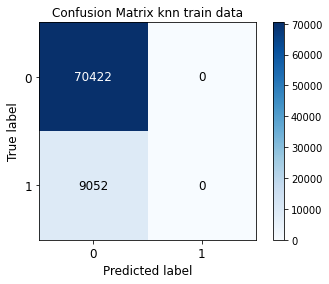

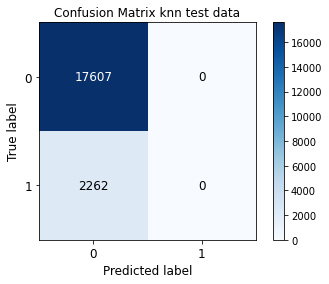

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_train, KNN_c_ypred_tr, title="Confusion Matrix knn train data",text_fontsize='large')
skplt.metrics.plot_confusion_matrix(Y_test, KNN_c_ypred_te, title="Confusion Matrix knn test data",text_fontsize='large')
plt.show()

##SVM

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_score, recall_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import time
from scipy import stats
from typing import Dict, Any
from abc import ABC,abstractmethod
import scikitplot as skplt
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import mean_squared_error,\
 mean_absolute_error,\
 accuracy_score,\
 precision_score,\
 recall_score,\
 f1_score,\
 make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


In [ ]:
def projection_simplex(v, z=1):
    """
    Projection onto the simplex:
        w^* = argmin_w 0.5 ||w-v||^2 s.t. \sum_i w_i = z, w_i >= 0
    """
    # For other algorithms computing the same projection, see
    # https://gist.github.com/mblondel/6f3b7aaad90606b98f71
    n_features = v.shape[0]
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u) - z
    ind = np.arange(n_features) + 1
    cond = u - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    w = np.maximum(v - theta, 0)
    return w

In [ ]:
class MulticlassSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1, max_iter=50, tol=0.05,
                 random_state=None, verbose=0):
        self.C = C
        self.max_iter = max_iter
        self.tol = tol,
        self.random_state = random_state
        self.verbose = verbose
    def _partial_gradient(self, X, y, i):
        # Partial gradient for the ith sample.
        g = np.dot(X[i], self.coef_.T) + 1
        g[y[i]] -= 1
        return g
    def _violation(self, g, y, i):
        # Optimality violation for the ith sample.
        smallest = np.inf
        for k in range(g.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue
            smallest = min(smallest, g[k])
        return g.max() - smallest
    def _solve_subproblem(self, g, y, norms, i):
        # Prepare inputs to the projection.
        Ci = np.zeros(g.shape[0])
        Ci[y[i]] = self.C
        beta_hat = norms[i] * (Ci - self.dual_coef_[:, i]) + g / norms[i]
        z = self.C * norms[i]
        # Compute projection onto the simplex.
        beta = projection_simplex(beta_hat, z)
        return Ci - self.dual_coef_[:, i] - beta / norms[i]
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Normalize labels.
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)
        # Initialize primal and dual coefficients.
        n_classes = len(self._label_encoder.classes_)
        self.dual_coef_ = np.zeros((n_classes, n_samples), dtype=np.float64)
        self.coef_ = np.zeros((n_classes, n_features))
        # Pre-compute norms.
        norms = np.sqrt(np.sum(X ** 2, axis=1))
        # Shuffle sample indices.
        rs = check_random_state(self.random_state)
        ind = np.arange(n_samples)
        rs.shuffle(ind)
        violation_init = None
        for it in range(self.max_iter):
            violation_sum = 0
            for ii in range(n_samples):
                i = ind[ii]
                # All-zero samples can be safely ignored.
                if norms[i] == 0:
                    continue
                g = self._partial_gradient(X, y, i)
                v = self._violation(g, y, i)
                violation_sum += v
                if v < 1e-12:
                    continue
                # Solve subproblem for the ith sample.
                delta = self._solve_subproblem(g, y, norms, i)
                # Update primal and dual coefficients.
                self.coef_ += (delta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += delta
            if it == 0:
                violation_init = violation_sum
            vratio = violation_sum / violation_init
            if self.verbose >= 1:
                print("iter", it + 1, "violation", round(vratio,4))
            if vratio < self.tol:
                if self.verbose >= 1:
                    print("Converged")
                break
        return self
    def predict(self, X):
        decision = np.dot(X, self.coef_.T)
        pred = decision.argmax(axis=1)
        return self._label_encoder.inverse_transform(pred)

**Fitting the model**

In [ ]:
clf = MulticlassSVM(C=0.1, tol=0.01, max_iter=20, random_state=0, verbose=1)

In [ ]:
clf.fit(X_train,Y_train)

iter 1 violation 1.0
iter 2 violation 1.0186
iter 3 violation 1.007
iter 4 violation 0.9863
iter 5 violation 0.9599
iter 6 violation 0.927
iter 7 violation 0.8902
iter 8 violation 0.8416
iter 9 violation 0.7982
iter 10 violation 0.756
iter 11 violation 0.7104
iter 12 violation 0.6709
iter 13 violation 0.6318
iter 14 violation 0.5931
iter 15 violation 0.5554
iter 16 violation 0.519
iter 17 violation 0.4873
iter 18 violation 0.454
iter 19 violation 0.4275
iter 20 violation 0.4028


MulticlassSVM(C=0.1, max_iter=20, random_state=0, tol=(0.01,), verbose=1)

**Predictions on training & testing**

In [ ]:
svm_predictions_tr = clf.predict(X_train)
svm_predictions_te = clf.predict(X_test)

**Performance metrics**

**Accuracy and Classification report**

In [ ]:
print("accuracy_score:", round(accuracy_score(Y_train,svm_predictions_tr)*100,2),'%')

accuracy_score: 64.22 %


In [ ]:
print("accuracy_score:", round(accuracy_score(Y_test,svm_predictions_te)*100,2),'%')

accuracy_score: 64.39 %


In [ ]:
print(f"Classification Report of SVM train data = \n", classification_report(Y_train, svm_predictions_tr))
print(f"Classification Report of SVM test data = \n", classification_report(Y_test, svm_predictions_te))

Classification Report of SVM train data = 
               precision    recall  f1-score   support

           0       0.90      0.67      0.77     70422
           1       0.14      0.42      0.21      9052

    accuracy                           0.64     79474
   macro avg       0.52      0.55      0.49     79474
weighted avg       0.81      0.64      0.71     79474

Classification Report of SVM test data = 
               precision    recall  f1-score   support

           0       0.90      0.67      0.77     17607
           1       0.14      0.43      0.22      2262

    accuracy                           0.64     19869
   macro avg       0.52      0.55      0.49     19869
weighted avg       0.82      0.64      0.71     19869



**Classification matrix**

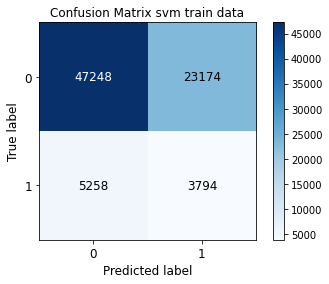

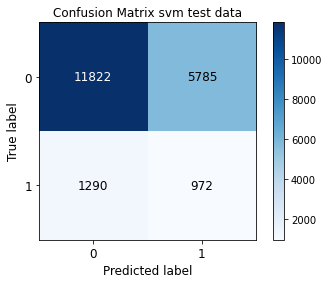

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_train,svm_predictions_tr , title="Confusion Matrix svm train data",text_fontsize='large')
skplt.metrics.plot_confusion_matrix(Y_test,svm_predictions_te , title="Confusion Matrix svm test data",text_fontsize='large')
plt.show()

**Gradient boosting**

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
from zipfile import ZipFile
file_name = '/content/project_models.zip'

In [119]:
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')
 




Done


In [120]:
#Custom gradient boosting classifier
from models.gradientboosting import GradientBoostTreeClassifier

Fitting model

In [121]:
gbc = GradientBoostTreeClassifier() 
#fit the model
gbc.fit(X_train,Y_train)

**Predictions on training data**

In [45]:
#custom function to calculate accuracy score for classiciation model .
def accuracy(actual,predicted,normalize=True):
    accuracy=[]
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            accuracy.append(1)
        else:
            accuracy.append(0)
    if normalize==True:
        return np.mean(accuracy)
    if normalize==False:
        return sum(accuracy)

GradientBoost Classifier Accuracy on Train data: 89.11 %


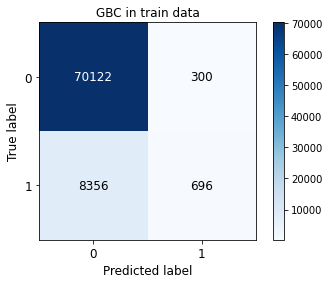

In [50]:
#Predicting results on Train Data
GBC_Y_train_pred = gbc.predict(X_train)
GBC_train_acc = accuracy(Y_train,GBC_Y_train_pred)
print('GradientBoost Classifier Accuracy on Train data:',round(GBC_train_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_train, GBC_Y_train_pred, title="GBC in train data",
                text_fontsize='large')
plt.show()

**Predictions on tesing data**

GradientBoost Classifier Accuracy on Test data: 88.18 %


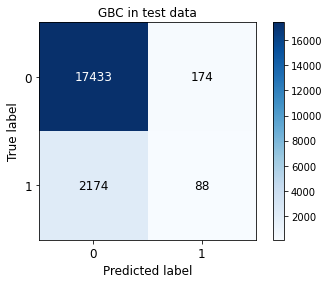

In [52]:
#Predicting results on Test Data
GBC_Y_test_pred = gbc.predict(X_test)
GBC_test_acc = accuracy(Y_test,GBC_Y_test_pred)
print('GradientBoost Classifier Accuracy on Test data:',round(GBC_test_acc*100,2),'%')
#Confusion matrix
skplt.metrics.plot_confusion_matrix(Y_test, GBC_Y_test_pred, title="GBC in test data",
                text_fontsize='large')
plt.show()

**Neural networks**

In [54]:
df_final = df_data[:10000]

In [55]:
x=df_final.drop(['target'],axis=1).values
y=df_final['target'].values

In [56]:
X = x.T

In [57]:
from sklearn import preprocessing

In [58]:
lb = preprocessing.LabelBinarizer()
Y = lb.fit_transform(y)
y_next = np.where(y==0,1,0)
Y = Y.T
Y = list(Y)
Y.append(y_next)
Y = np.array(Y)

**NN Custom model**

In [60]:
class DNNClassifier(object):
    '''
    Parameters: layer_dims -- List Dimensions of layers including input and output layer
                hidden_layers -- List of hidden layers
                                 'relu','sigmoid','tanh','softplus','arctan','elu','identity','softmax'
                                 Note: 1. last layer must be softmax 
                                       2. For relu and elu need to mention alpha value as below
                                        ['tanh',('relu',alpha1),('elu',alpha2),('relu',alpha3),'softmax']
                                        need to give a tuple for relu and elu if you want to mention alpha
                                        if not default alpha is 0
                init_type -- init_type -- he_normal  --> N(0,sqrt(2/fanin))
                             he_uniform --> Uniform(-sqrt(6/fanin),sqrt(6/fanin))
                             xavier_normal --> N(0,2/(fanin+fanout))
                             xavier_uniform --> Uniform(-sqrt(6/fanin+fanout),sqrt(6/fanin+fanout))
                                 
                learning_rate -- Learning rate
                optimization_method -- optimization method 'SGD','SGDM','RMSP','ADAM'
                batch_size -- Batch size to update weights 
                max_epoch -- Max epoch number
                             Note : Max_iter  = max_epoch * (size of traing / batch size)
                tolarance -- if abs(previous cost  - current cost ) < tol training will be stopped
                             if None -- No check will be performed
                keep_proba -- probability for dropout
                              if 1 then there is no dropout
                penality -- regularization penality
                            values taken 'l1','l2',None(default)
                lamda -- l1 or l2 regularization value
                beta1 -- SGDM and adam optimization param
                beta2 -- RMSP and adam optimization value
                seed -- Random seed to generate randomness
                verbose -- takes 0  or 1 
    '''
    
    def __init__(self,layer_dims,hidden_layers,init_type='he_normal',learning_rate=0.1,
                 optimization_method = 'SGD',batch_size=64,max_epoch=100,tolarance = 0.00001,
                 keep_proba=1,penality=None,lamda=0,beta1=0.9,
                 beta2=0.999,seed=None,verbose=0):
        self.layer_dims = layer_dims
        self.hidden_layers = hidden_layers
        self.init_type = init_type
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.batch_size = batch_size
        self.keep_proba = keep_proba
        self.penality = penality
        self.lamda = lamda
        self.beta1 = beta1
        self.beta2 = beta2
        self.seed = seed
        self.max_epoch = max_epoch
        self.tol = tolarance
        self.verbose = verbose
    @staticmethod
    def weights_init(layer_dims,init_type='he_normal',seed=None):
        
        """
        Arguments:
            layer_dims -- python array (list) containing the dimensions of each layer in our network
            layer_dims lis is like  [ no of input features,# of neurons in hidden layer-1,..,
                                     # of neurons in hidden layer-n shape,output]
            init_type -- he_normal  --> N(0,sqrt(2/fanin))
                         he_uniform --> Uniform(-sqrt(6/fanin),sqrt(6/fanin))
                         xavier_normal --> N(0,2/(fanin+fanout))
                         xavier_uniform --> Uniform(-sqrt(6/fanin+fanout),sqrt(6/fanin+fanout))
                         seed -- random seed to generate weights
        Returns:
            parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
        """
        np.random.seed(seed)
        parameters = {}
        opt_parameters = {}
        L = len(layer_dims)            # number of layers in the network
        if  init_type == 'he_normal':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.normal(0,np.sqrt(2.0/layer_dims[l-1]),(layer_dims[l], 1))  
            
        elif init_type == 'he_uniform':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.uniform(-np.sqrt(6.0/layer_dims[l-1]),
                                                        np.sqrt(6.0/layer_dims[l-1]),
                                                        (layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.uniform(-np.sqrt(6.0/layer_dims[l-1]),
                                                        np.sqrt(6.0/layer_dims[l-1]),
                                                        (layer_dims[l], 1))
            
        elif init_type == 'xavier_normal':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.normal(0,2.0/(layer_dims[l]+layer_dims[l-1]),
                                                                   (layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.normal(0,2.0/(layer_dims[l]+layer_dims[l-1]),
                                                                      (layer_dims[l], 1)) 
            
        elif init_type == 'xavier_uniform':
            for l in range(1, L):
                parameters['W' + str(l)] = np.random.uniform(-(np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (layer_dims[l], layer_dims[l-1]))
                parameters['b' + str(l)] = np.random.uniform(-(np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (np.sqrt(6.0/(layer_dims[l]+layer_dims[l-1]))),
                                                        (layer_dims[l], 1))
        
        return parameters
    
    @staticmethod
    def sigmoid(X,derivative=False):
        '''Compute Sigmaoid and its derivative'''
        if derivative == False:
            out = 1 / (1 + np.exp(-np.array(X)))
        elif derivative == True:
            s = 1 / (1 + np.exp(-np.array(X)))
            out = s*(1-s)
        return out
    @staticmethod
    def ReLU(X,alpha=0,derivative=False):
        '''Compute ReLU function and derivative'''
        X = np.array(X,dtype=np.float64)
        if derivative == False:
            return np.where(X<0,alpha*X,X)
        elif derivative == True:
            X_relu = np.ones_like(X,dtype=np.float64)
            X_relu[X < 0] = alpha
            return X_relu
    @staticmethod
    def Tanh(X,derivative=False):
        '''Compute tanh values and derivative of tanh'''
        X = np.array(X)
        if derivative == False:
            return np.tanh(X)
        if derivative == True:
            return 1 - (np.tanh(X))**2
    @staticmethod
    def softplus(X,derivative=False):
        '''Compute tanh values and derivative of tanh'''
        X = np.array(X)
        if derivative == False:
            return np.log(1+np.exp(X))
        if derivative == True:
            return 1 / (1 + np.exp(-np.array(X)))
    @staticmethod
    def arctan(X,derivative=False):
        '''Compute tan^-1(X) and derivative'''
        if derivative == False:
            return  np.arctan(X)
        if derivative == True:
            return 1/ (1 + np.square(X))
    @staticmethod
    def identity(X,derivative=False):
        '''identity function and derivative f(x) = x'''
        X = np.array(X)
        if derivative ==  False:
            return X
        if derivative == True:
            return np.ones_like(X)
    @staticmethod
    def elu(X,alpha=0,derivative=False):
        '''Exponential Linear Unit'''
        X = np.array(X,dtype=np.float64)
        if derivative == False:
            return np.where(X<0,alpha*(np.exp(X)-1),X)
        elif derivative == True:
            return np.where(X<0,alpha*(np.exp(X)),1)
    @staticmethod
    def softmax(X):
        """Compute softmax values for each sets of scores in x."""
        return np.exp(X) / np.sum(np.exp(X),axis=0)
    @staticmethod
    def forward_propagation(X, hidden_layers,parameters,keep_prob=1,seed=None):
    
        """"
        Arguments:
            X -- data, numpy array of shape (input size, number of examples)
            hidden_layers -- List of hideden layers
            weights -- Output of weights_init dict (parameters)
            keep_prob -- probability of keeping a neuron active during drop-out, scalar
        Returns:
            AL -- last post-activation value
            caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
        """
        if seed != None:
            np.random.seed(seed)
        caches = []
        A = X
        L = len(hidden_layers)
        for l,active_function in enumerate(hidden_layers,start=1):
            A_prev = A 
        
            Z = np.dot(parameters['W' + str(l)],A_prev)+parameters['b' + str(l)]
            
            if type(active_function) is tuple:
                
                if  active_function[0] == "relu":
                    A = DNNClassifier.ReLU(Z,active_function[1])
                elif active_function[0] == 'elu':
                    A = DNNClassifier.elu(Z,active_function[1])
            else:
                if active_function == "sigmoid":
                    A = DNNClassifier.sigmoid(Z)
                elif active_function == "identity":
                    A = DNNClassifier.identity(Z)
                elif active_function == "arctan":
                    A = DNNClassifier.arctan(Z)
                elif active_function == "softplus":
                    A = DNNClassifier.softplus(Z)
                elif active_function == "tanh":
                    A = DNNClassifier.Tanh(Z)
                elif active_function == "softmax":
                    A = DNNClassifier.softmax(Z)
                elif  active_function == "relu":
                    A = DNNClassifier.ReLU(Z)
                elif active_function == 'elu':
                    A = DNNClassifier.elu(Z)
            
            if keep_prob != 1 and l != L and l != 1:
                D = np.random.rand(A.shape[0],A.shape[1])
                D = (D<keep_prob)
                A = np.multiply(A,D)
                A = A / keep_prob
                cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)],D), Z)
                caches.append(cache)
            else:
                cache = ((A_prev, parameters['W' + str(l)],parameters['b' + str(l)]), Z)
                #print(A.shape)
                caches.append(cache)      
        return A, caches
    @staticmethod
    def compute_cost(A, Y, parameters, lamda=0,penality=None):
        """
        Implement the cost function with L2 regularization. See formula (2) above.
    
        Arguments:
            A -- post-activation, output of forward propagation
            Y -- "true" labels vector, of shape (output size, number of examples)
            parameters -- python dictionary containing parameters of the model
    
        Returns:
            cost - value of the regularized loss function 
        """
        m = Y.shape[1]
    
        cost = np.squeeze(-np.sum(np.multiply(np.log(A),Y))/m)
    
        L = len(parameters)//2
    
        if penality == 'l2' and lamda != 0:
            sum_weights = 0
            for l in range(1, L):
                sum_weights = sum_weights + np.sum(np.square(parameters['W' + str(l)]))
            cost = cost + sum_weights * (lamda/(2*m))
        elif penality == 'l1' and lamda != 0:
            sum_weights = 0
            for l in range(1, L):
                sum_weights = sum_weights + np.sum(np.abs(parameters['W' + str(l)]))
            cost = cost + sum_weights * (lamda/(2*m))
        return cost
    @staticmethod
    def back_propagation(AL, Y, caches, hidden_layers, keep_prob=1, penality=None,lamda=0):
        """
        Implement the backward propagation
    
        Arguments:
            AL -- probability vector, output of the forward propagation (L_model_forward())
            Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
            caches -- list of caches containing:
            hidden_layers -- hidden layer names
            keep_prob -- probabaility for dropout
            penality -- regularization penality 'l1' or 'l2' or None
    
        Returns:
             grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
        """
        grads = {}
        L = len(caches) # the number of layers
    
        m = AL.shape[1]
        Y = Y.reshape(AL.shape)
    
        # Initializing the backpropagation
        dZL = AL - Y
    
        cache = caches[L-1]
        linear_cache, activation_cache = cache
        AL, W, b = linear_cache
        grads["dW" + str(L)] = np.dot(dZL,AL.T)/m
        grads["db" + str(L)] = np.sum(dZL,axis=1,keepdims=True)/m
        grads["dA" + str(L-1)] = np.dot(W.T,dZL)
    
    
        # Loop from l=L-2 to l=0
        v_dropout = 0
        for l in reversed(range(L-1)):
            cache = caches[l]
            active_function = hidden_layers[l]
        
            linear_cache, Z = cache
            try:
                A_prev, W, b = linear_cache
            except:
                A_prev, W, b, D = linear_cache
                v_dropout = 1
            
            m = A_prev.shape[1]
        
            if keep_prob != 1 and v_dropout == 1:
                dA_prev = np.multiply(grads["dA" + str(l + 1)],D)
                dA_prev = dA_prev/keep_prob
                v_dropout = 0
            else:
                dA_prev = grads["dA" + str(l + 1)]
                v_dropout = 0
            
            
            if type(active_function) is tuple:
                
                if  active_function[0] == "relu":
                    dZ = np.multiply(dA_prev,DNNClassifier.ReLU(Z,active_function[1],derivative=True))
                elif active_function[0] == 'elu':
                    dZ = np.multiply(dA_prev,DNNClassifier.elu(Z,active_function[1],derivative=True))
            else:
                if active_function == "sigmoid":
                    dZ = np.multiply(dA_prev,DNNClassifier.sigmoid(Z,derivative=True))
                elif active_function == "relu":
                    dZ = np.multiply(dA_prev,DNNClassifier.ReLU(Z,derivative=True))
                elif active_function == "tanh":
                    dZ = np.multiply(dA_prev,DNNClassifier.Tanh(Z,derivative=True))
                elif active_function == "identity":
                    dZ = np.multiply(dA_prev,DNNClassifier.identity(Z,derivative=True))
                elif active_function == "arctan":
                    dZ = np.multiply(dA_prev,DNNClassifier.arctan(Z,derivative=True))
                elif active_function == "softplus":
                    dZ = np.multiply(dA_prev,DNNClassifier.softplus(Z,derivative=True))
                elif active_function == 'elu':
                    dZ = np.multiply(dA_prev,DNNClassifier.elu(Z,derivative=True))
            
            grads["dA" + str(l)] = np.dot(W.T,dZ)
        
            if penality == 'l2':
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lamda * W)/m)
            elif penality == 'l1':
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)  + ((lamda * np.sign(W+10**-8))/m)
            else:
                grads["dW" + str(l + 1)] = (np.dot(dZ,A_prev.T)/m)
            
            grads["db" + str(l + 1)] = np.sum(dZ,axis=1,keepdims=True)/m   
        return grads
    
    @staticmethod
    def update_parameters(parameters, grads,learning_rate,iter_no,method = 'SGD',opt_parameters=None,beta1=0.9,beta2=0.999):
        """
        Update parameters using gradient descent
    
        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients, output of L_model_backward
        method -- method for updation of weights
                  'SGD','SGDM','RMSP','ADAM'
        learning rate -- learning rate alpha value
        beta1 -- weighted avg parameter for SGDM and ADAM
        beta2 -- weighted avg parameter for RMSP and ADAM
    
        Returns:
        parameters -- python dictionary containing your updated parameters 
                      parameters["W" + str(l)] = ... 
                      parameters["b" + str(l)] = ...
                      opt_parameters
        """
    
        L = len(parameters) // 2 # number of layers in the neural network
        if method == 'SGD':
            for l in range(L):
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l + 1)]
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l + 1)]
            opt_parameters = None
        elif method == 'SGDM':
            for l in range(L):
                opt_parameters['vdb'+str(l+1)] = beta1*opt_parameters['vdb'+str(l+1)] + (1-beta1)*grads["db" + str(l + 1)]
                opt_parameters['vdw'+str(l+1)] = beta1*opt_parameters['vdw'+str(l+1)] + (1-beta1)*grads["dW" + str(l + 1)]
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*opt_parameters['vdw'+str(l+1)]
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*opt_parameters['vdb'+str(l+1)]
        elif method == 'RMSP':
            for l in range(L):
                opt_parameters['sdb'+str(l+1)] = beta2*opt_parameters['sdb'+str(l+1)] + \
                                                     (1-beta2)*np.square(grads["db" + str(l + 1)])
                opt_parameters['sdw'+str(l+1)] = beta2*opt_parameters['sdw'+str(l+1)] + \
                                                           (1-beta2)*np.square(grads["dW" + str(l + 1)])
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
                                       learning_rate*(grads["dW" + str(l + 1)]/(np.sqrt(opt_parameters['sdw'+str(l+1)])+10**-8))
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
                                       learning_rate*(grads["db" + str(l + 1)]/(np.sqrt(opt_parameters['sdb'+str(l+1)])+10**-8))
        elif method == 'ADAM':
            for l in range(L):
                opt_parameters['vdb'+str(l+1)] = beta1*opt_parameters['vdb'+str(l+1)] + (1-beta1)*grads["db" + str(l + 1)]
                opt_parameters['vdw'+str(l+1)] = beta1*opt_parameters['vdw'+str(l+1)] + (1-beta1)*grads["dW" + str(l + 1)]
                opt_parameters['sdb'+str(l+1)] = beta2*opt_parameters['sdb'+str(l+1)] + \
                                                                  (1-beta2)*np.square(grads["db" + str(l + 1)])
                opt_parameters['sdw'+str(l+1)] = beta2*opt_parameters['sdw'+str(l+1)] + \
                                                                   (1-beta2)*np.square(grads["dW" + str(l + 1)])
            
                learning_rate = learning_rate * np.sqrt((1-beta2**iter_no)/((1-beta1**iter_no)+10**-8))
                parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdw'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdw'+str(l+1)])+10**-8))
                parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
                                       learning_rate*(opt_parameters['vdb'+str(l+1)]/\
                                                      (np.sqrt(opt_parameters['sdb'+str(l+1)])+10**-8))
        
        return parameters,opt_parameters
    
    def fit(self,X,y):
        '''
        X -- data, numpy array of shape (input size, number of examples)
        y -- lables, numpy array of shape (no of classes,n)
        
        '''
        
        np.random.seed(self.seed)
        self.grads = {}
        self.costs = []
        M = X.shape[1]
        opt_parameters = {}
        
        if self.verbose == 1:
            print('Initilizing Weights...')
        self.parameters = self.weights_init(self.layer_dims,self.init_type,self.seed)
        self.iter_no = 0
        idx = np.arange(0,M)
        
        if self.optimization_method != 'SGD':
            for l in range(1, len(self.layer_dims)):
                opt_parameters['vdw' + str(l)] = np.zeros((self.layer_dims[l], self.layer_dims[l-1]))
                opt_parameters['vdb' + str(l)] = np.zeros((self.layer_dims[l], 1))
                opt_parameters['sdw' + str(l)] = np.zeros((self.layer_dims[l], self.layer_dims[l-1]))
                opt_parameters['sdb' + str(l)] = np.zeros((self.layer_dims[l], 1)) 
        
        if self.verbose == 1:
            print('Starting Training...')
            
        for epoch_no in range(1,self.max_epoch+1):
            np.random.shuffle(idx)
            X = X[:,idx]
            y = y[:,idx]
            for i in range(0,M, self.batch_size):
                self.iter_no = self.iter_no + 1
                X_batch = X[:,i:i + self.batch_size]
                y_batch = y[:,i:i + self.batch_size]
                # Forward propagation:
                AL, cache = self.forward_propagation(X_batch,self.hidden_layers,self.parameters,self.keep_proba,self.seed)
                #cost
                cost = self.compute_cost(AL, y_batch, self.parameters,self.lamda,self.penality)
                self.costs.append(cost)
                
                if self.tol != None:
                    try:
                        if abs(cost - self.costs[-2]) < self.tol:
                            return self
                    except:
                        pass
                #back prop
                grads = self.back_propagation(AL, y_batch, cache,self.hidden_layers,self.keep_proba,self.penality,self.lamda)
                
                #update params
                self.parameters,opt_parameters = self.update_parameters(self.parameters,grads,self.learning_rate,
                                                                        self.iter_no-1,self.optimization_method,
                                                                        opt_parameters,self.beta1,self.beta2)
                
                if self.verbose == 1:
                    if self.iter_no % 100 == 0:
                        print("Cost after iteration {}: {}".format(self.iter_no, cost))
                
        return self
    def predict(self,X,proba=False):
        '''predicting values
           arguments: X - iput data
                      proba -- False then return value
                               True then return probabaility
        '''
        
        out, _ = self.forward_propagation(X,self.hidden_layers,self.parameters,self.keep_proba,self.seed)
        if proba == True:
            return out.T
        else:
            return np.argmax(out, axis=0)

**using ADAM**

In [61]:
model = DNNClassifier(layer_dims=[X.shape[0], 6, 4,3, 2],hidden_layers=[('relu',0),('relu',0.001),'sigmoid','softmax'],
                      optimization_method='ADAM',tolarance=None,batch_size=512,max_epoch=700,verbose=1,seed=25)
model.fit(X,Y)

Initilizing Weights...
Starting Training...
Cost after iteration 100: 0.531734260563545
Cost after iteration 200: 0.3751651356813384
Cost after iteration 300: 0.2874586879072787
Cost after iteration 400: 0.34712982115714336
Cost after iteration 500: 0.33180839286431935
Cost after iteration 600: 0.31650012947339007
Cost after iteration 700: 0.36249049733040445
Cost after iteration 800: 0.35480957651555
Cost after iteration 900: 0.40956245500618116
Cost after iteration 1000: 0.3702918670161986
Cost after iteration 1100: 0.3091694402289993
Cost after iteration 1200: 0.3171175606411282
Cost after iteration 1300: 0.3706608038260561
Cost after iteration 1400: 0.406890672541872
Cost after iteration 1500: 0.3941041409266112
Cost after iteration 1600: 0.34712982284070293
Cost after iteration 1700: 0.3175706696883159
Cost after iteration 1800: 0.3933181016022536
Cost after iteration 1900: 0.3473212414244376
Cost after iteration 2000: 0.4020692442243877
Cost after iteration 2100: 0.32384941051784

**Predictions**

In [62]:
y_pred_adam = model.predict(X,proba=False)
y_pred_adam

array([1, 1, 1, ..., 1, 1, 1])

**Accuracy**

In [63]:
print("accuracy_score:",round(accuracy_score(y,y_pred_adam)*100,2),'%')

accuracy_score: 11.08 %


**Confusion matrix**

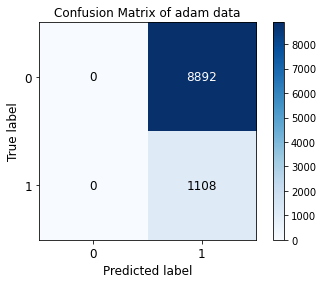

In [64]:
skplt.metrics.plot_confusion_matrix(y,y_pred_adam, title="Confusion Matrix of adam data",text_fontsize='large')

**With SGDM**

In [65]:
model = DNNClassifier(layer_dims=[X.shape[0], 6, 4,3, 2],hidden_layers=[('relu',0),('relu',0.001),'sigmoid','softmax'],
                      optimization_method='SGDM',tolarance=None,batch_size=512,max_epoch=700,verbose=1,seed=25)
model.fit(X,Y)

Initilizing Weights...
Starting Training...
Cost after iteration 100: 0.30943978885492035
Cost after iteration 200: 0.36271638683672774
Cost after iteration 300: 0.2859078337115397
Cost after iteration 400: 0.34716246318576827
Cost after iteration 500: 0.33184046648733767
Cost after iteration 600: 0.3164493467930242
Cost after iteration 700: 0.3627533908972379
Cost after iteration 800: 0.35528707100983814
Cost after iteration 900: 0.4087093060385874
Cost after iteration 1000: 0.3701612195834427
Cost after iteration 1100: 0.30875594566305165
Cost after iteration 1200: 0.31668154293416484
Cost after iteration 1300: 0.37027891518615685
Cost after iteration 1400: 0.4089655826143452
Cost after iteration 1500: 0.39328040679996795
Cost after iteration 1600: 0.3471147558269819
Cost after iteration 1700: 0.3163645654748117
Cost after iteration 1800: 0.39293160054996745
Cost after iteration 1900: 0.3471260464946993
Cost after iteration 2000: 0.40075228542049307
Cost after iteration 2100: 0.32403

**Predictions**

In [66]:
y_pred_SGDM = model.predict(X,proba=False)
y_pred_SGDM

array([1, 1, 1, ..., 1, 1, 1])

**Accuracy and confusion matrix**

In [67]:
print("accuracy_score:",round(accuracy_score(y,y_pred_SGDM)*100,2),'%')

accuracy_score: 11.08 %


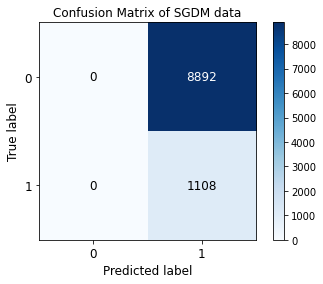

In [68]:
skplt.metrics.plot_confusion_matrix(y,y_pred_SGDM, title="Confusion Matrix of SGDM data",text_fontsize='large')